In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from time import sleep
from datetime import date, timedelta, datetime, timezone
from tqdm.auto import tqdm
tqdm.pandas()

# Simulation data Ecolight

In [472]:
simulation_df = pd.read_excel("../data/raw/NOMAD/Hydrolight-Ecolight.xlsx", sheet_name="aph", header=1)
simulation_df = simulation_df.rename(columns={"[Chl]":"chla", 412:"rrs_MOD1", 443:"rrs_MOD2", \
                                              488:"rrs_MOD3", 531:"rrs_MOD4", 547:"rrs_MOD5", 667:"rrs_MOD6", 
                                              678:"rrs_MOD7"})

In [473]:
simulation_df.corrwith(simulation_df["chla"])

chla    1.000000
350     0.905356
351     0.907384
352     0.909311
353     0.911126
          ...   
795     0.786347
796     0.783665
797     0.777930
798     0.769613
799     0.759192
Length: 451, dtype: float64

In [474]:
simulation_df["ratio_1:5"] = simulation_df["rrs_MOD1"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_2:5"] = simulation_df["rrs_MOD2"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_3:5"] = simulation_df["rrs_MOD3"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_4:5"] = simulation_df["rrs_MOD4"] / simulation_df["rrs_MOD5"]
simulation_df[["ratio_1:5", "ratio_2:5", "ratio_3:5", "ratio_4:5"]].corrwith(simulation_df["chla"])

ratio_1:5    0.004917
ratio_2:5    0.000603
ratio_3:5   -0.013399
ratio_4:5    0.006269
dtype: float64

# Simulation data MOMO

In [470]:
simulation_df = pd.read_csv("../data/processed/NOMAD/MOMO_LUT_1M_uniform.csv")
simulation_df = simulation_df.rename(columns={"apig":"chla", "Rrs_412":"rrs_MOD1", "Rrs_443":"rrs_MOD2", \
                                              "Rrs_488":"rrs_MOD3", "Rrs_531":"rrs_MOD4", "Rrs_547":"rrs_MOD5", \
                                              "Rrs_667":"rrs_MOD6", "Rrs_678":"rrs_MOD7"})
simulation_df.describe()

,Unnamed: 0,Unnamed: 0.1,adg,chla,aratio,aza,bratio,btot,sal,sza,...,rrs_MOD1,rrs_MOD2,Rrs_469,rrs_MOD3,rrs_MOD4,rrs_MOD5,Rrs_555,Rrs_645,rrs_MOD6,rrs_MOD7
count,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,1.822500e+07,6.693162,3.574129,0.499999,89.999842,0.608307,76.323949,17.500000,43.294557,...,3.460900e-02,0.033022,0.032495,0.032240,0.029327,0.029000,0.028769,0.020671,0.018225,0.017842
std,288675.278932,1.052222e+07,16.359417,7.478713,0.408248,54.083339,0.436052,196.333628,17.500009,27.050451,...,6.712268e-02,0.065175,0.064343,0.063790,0.059709,0.059022,0.058593,0.046998,0.043341,0.042661
min,0.000000,0.000000e+00,0.000000,0.000500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.940697e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
25%,249999.750000,9.112499e+06,0.000305,0.005536,0.000000,45.000000,0.000000,0.000537,0.000000,22.978826,...,9.334087e-05,0.000088,0.000100,0.000112,0.000139,0.000150,0.000156,0.000059,0.000037,0.000033
50%,499999.500000,1.822500e+07,0.032713,0.132617,0.500000,90.000000,0.825000,0.029868,17.500000,43.640906,...,2.243042e-03,0.002096,0.002089,0.002125,0.001169,0.000967,0.000854,0.000128,0.000088,0.000081
75%,749999.250000,2.733750e+07,1.747841,2.258003,1.000000,135.000000,1.000000,12.074444,35.000000,64.251922,...,2.529907e-02,0.022827,0.022736,0.022446,0.022202,0.021683,0.021606,0.012552,0.009193,0.008738
max,999999.000000,3.645000e+07,55.000000,25.000000,1.000000,180.000000,1.000000,660.000000,35.000000,84.850827,...,6.284180e-01,0.315430,0.303711,0.297363,0.285645,0.283691,0.282471,0.254883,0.245483,0.243164


In [471]:
simulation_df["ratio_1:5"] = simulation_df["rrs_MOD1"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_2:5"] = simulation_df["rrs_MOD2"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_3:5"] = simulation_df["rrs_MOD3"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_4:5"] = simulation_df["rrs_MOD4"] / simulation_df["rrs_MOD5"]
simulation_df[["ratio_1:5", "ratio_2:5", "ratio_3:5", "ratio_4:5"]].corrwith(simulation_df["chla"])

ratio_1:5    0.001444
ratio_2:5    0.000880
ratio_3:5    0.000220
ratio_4:5    0.000312
dtype: float64

# Simulation data Hydropt

In [298]:
!pip install hydropt-oc

     |████████████████████████████████| 49 kB 4.4 MB/s  eta 0:00:01


In [299]:
import hydropt.hydropt as hd

In [399]:
import hydropt.bio_optics as bo
help(bo)

Help on module hydropt.bio_optics in hydropt:

NAME
    hydropt.bio_optics

FUNCTIONS
    cdom(*args, wb)
        IOP model for CDOM
    
    clear_nat_water(*args)
        IOP model for clear natural water
    
    micro(*args)
        micro IOP model
        
        chl - concentration in mg/m3
    
    nano(*args)
        nano IOP model
        
        chl - concentration in mg/m3
    
    nap(*args, wb)
        IOP model for NAP
    
    phyto(*args)
        IOP model for phytoplankton w. 
        packaging effect - according to Prieur&Sathyenadrath (1981)
        basis vector - according to Ciotti&Cullen 2002
    
    phyto_olci(*args)
        IOP model for phytoplankton w. 
        packaging effect - according to Prieur&Sathyenadrath (1981)
        basis vector - according to Ciotti&Cullen 2002
    
    pico(*args)
        pico IOP model
        
        chl - concentration in mg/m3

DATA
    H2O_IOP_DEFAULT =                    a        bb
    wavelength       ...0...
    H2O_

In [300]:
from hydropt.bio_optics import H2O_IOP_DEFAULT

def clear_nat_water(*args):
    return H2O_IOP_DEFAULT.T.values

/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/hydropt/utils.py:21: UserWarning: changed interpolation method
  warnings.warn('changed interpolation method')
/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/hydropt/bio_optics.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pico_siop.loc[710,:] = [0,0]
/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/hydropt/bio_optics.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nano_siop.loc[710,:] = [0,0]
/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/hydropt/bio_optic

In [321]:
from hydropt.bio_optics import a_phyto_base_HSI

wavebands = np.arange(400, 711, 5)#np.array([412, 443, 488, 531, 547, 667, 678])


def phytoplankton(*args):
    chl = args[0]
    # basis vector - according to Ciotti&Cullen (2002)
    a = a_phyto_base_HSI.absorption.values
    # constant spectral backscatter with backscatter ratio of 1.4%
    bb = np.repeat(.014*0.18, len(a))

    return chl*np.array([a, bb])

In [322]:
def cdom(*args):
    # absorption at 440 nm
    a_440 = args[0]
    # spectral absorption
    a = np.array(np.exp(-0.017*(wavebands-440)))
    # no backscatter
    bb = np.zeros(len(a))

    return a_440*np.array([a, bb])

In [323]:
bio_opt = hd.BioOpticalModel()
# set optical models
bio_opt.set_iop(
    wavebands=wavebands,
    water=clear_nat_water,
    phyto=phytoplankton,
    cdom=cdom)

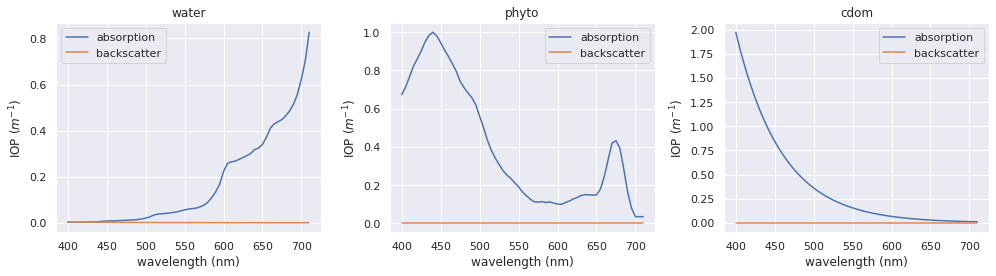

In [324]:
bio_opt.plot(water=None, phyto=1, cdom=1)

In [329]:
from smt.sampling_methods import LHS

def latin_hypercube_sampling(parameter_ranges, n_samples=1000):
    
    param_ranges = np.array([parameter_ranges[x] for x in parameter_ranges.keys()])
    param_names = list(parameter_ranges.keys())

    sampling = LHS(xlimits=param_ranges)
    
    samples = sampling(n_samples)
    
    param_configurations = [dict(zip(param_names,sample)) for sample in samples]
    
    return param_configurations

In [395]:
def create_hydropt_LUT(bio_opt, parameter_ranges={"phyto":(0, 100), "cdom":(0, 2)}, n_samples=100):
    fwd_model = hd.PolynomialForward(bio_opt)
    
    out = []
    
    all_params = latin_hypercube_sampling(parameter_ranges, n_samples)

    for params in tqdm(all_params):
    # calculate Rrs
        rrs = pd.DataFrame(fwd_model.forward(**params)).T
        out.append(rrs)
        
    return pd.concat(out).reset_index().join(pd.DataFrame(all_params))

In [396]:
simulation_df = create_hydropt_LUT(bio_opt, n_samples=100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [400]:
simulation_df.describe()

,index,400,405,410,415,420,425,430,435,440,...,675,680,685,690,695,700,705,710,phyto,cdom
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,0.0,0.000145,0.000137,0.000128,0.000120,0.000114,0.000108,0.000102,0.000098,0.000096,...,4.359295e-05,2.570299e-05,1.078922e-05,7.463813e-06,1.330116e-05,4.480724e-05,3.588692e-05,2.836969e-05,50.000000,1.000000
std,0.0,0.000022,0.000021,0.000019,0.000018,0.000018,0.000017,0.000017,0.000016,0.000016,...,1.076855e-04,7.755531e-05,4.373649e-05,3.595693e-05,5.702083e-05,1.401540e-04,1.173365e-04,9.622052e-05,28.867658,0.577353
min,0.0,0.000055,0.000057,0.000058,0.000060,0.000063,0.000065,0.000067,0.000069,0.000072,...,3.076347e-22,1.825676e-38,1.399243e-118,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000500,0.000010
25%,0.0,0.000140,0.000132,0.000123,0.000114,0.000109,0.000103,0.000096,0.000092,0.000090,...,4.997812e-17,5.947876e-29,3.227863e-87,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,25.000250,0.500005
50%,0.0,0.000144,0.000136,0.000126,0.000117,0.000111,0.000106,0.000100,0.000096,0.000094,...,1.157163e-11,4.487317e-19,9.401306e-55,2.085736e-191,1.850112e-285,6.922702e-138,1.129544e-208,1.211107e-317,50.000000,1.000000
75%,0.0,0.000149,0.000140,0.000130,0.000121,0.000116,0.000110,0.000104,0.000101,0.000099,...,1.742211e-06,2.493327e-09,9.982172e-23,4.926996e-66,1.392629e-73,7.046178e-24,4.117097e-33,9.565738e-46,74.999750,1.499995
max,0.0,0.001757,0.001693,0.001616,0.001535,0.001470,0.001403,0.001329,0.001268,0.001218,...,4.335773e-04,3.593934e-04,2.562457e-04,2.488407e-04,3.632411e-04,6.894899e-04,5.984826e-04,5.054483e-04,99.999500,1.999990


In [404]:
simulation_df = simulation_df.rename(columns={410:'rrs_MOD1', 445:'rrs_MOD2', 490:'rrs_MOD3', 530:'rrs_MOD4', 545:'rrs_MOD5',
       665:'rrs_MOD6', 680:'rrs_MOD7'})

In [407]:
simulation_df[['rrs_MOD1', 'rrs_MOD2', 'rrs_MOD3', 'rrs_MOD4', 'rrs_MOD5', 'rrs_MOD6', 'rrs_MOD7', 'phyto']].describe()

,rrs_MOD1,rrs_MOD2,rrs_MOD3,rrs_MOD4,rrs_MOD5,rrs_MOD6,rrs_MOD7,phyto
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000
mean,0.000128,0.000098,0.000140,0.000338,0.000454,7.604915e-05,2.570299e-05,50.000000
std,0.000019,0.000016,0.000020,0.000022,0.000023,1.477315e-04,7.755531e-05,28.867658
min,0.000058,0.000075,0.000105,0.000138,0.000150,2.026729e-14,1.825676e-38,0.000500
25%,0.000123,0.000091,0.000129,0.000325,0.000449,3.685166e-11,5.947876e-29,25.000250
50%,0.000126,0.000096,0.000138,0.000337,0.000454,6.442966e-08,4.487317e-19,50.000000
75%,0.000130,0.000101,0.000148,0.000348,0.000461,5.130256e-05,2.493327e-09,74.999750
max,0.001616,0.001193,0.001152,0.000986,0.000868,5.076307e-04,3.593934e-04,99.999500


In [409]:
simulation_df[['rrs_MOD1', 'rrs_MOD2', 'rrs_MOD3', 'rrs_MOD4', 'rrs_MOD5', 'rrs_MOD6', 'rrs_MOD7']].corrwith(simulation_df['phyto'])

rrs_MOD1   -0.198003
rrs_MOD2   -0.519063
rrs_MOD3   -0.679811
rrs_MOD4   -0.547507
rrs_MOD5   -0.025978
rrs_MOD6   -0.695330
rrs_MOD7   -0.512850
dtype: float64

# Simulation data IOCCG 2010

In [415]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x7f17f1789110>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whit

In [475]:
# Preprocessed by first removing all double spaces
simulation_df = pd.read_csv("../data/raw/NOMAD/IOCCG/toa_m80_case1.dat", sep=" ", skiprows=5, \
                           names=["nan", "chla", "aot", "solar_zenith", "observer_zenith", "relative_azimuth", \
                                    "rrs_MOD1",  "rrs_MOD2",  "rrs_MOD3",  "rrs_MOD4", "rrs_MOD5", "rrs_MOD6", 708, 765, 779, 865])

In [476]:
simulation_df

,nan,chla,aot,solar_zenith,observer_zenith,relative_azimuth,rrs_MOD1,rrs_MOD2,rrs_MOD3,rrs_MOD4,rrs_MOD5,rrs_MOD6,708,765,779,865
0,NaN,0.03,0.05,0.0,5.0,90.0,0.053756,0.045730,0.033120,0.028592,0.020755,0.013408,0.012016,0.010835,0.010562,0.009613
1,NaN,0.03,0.05,0.0,25.0,90.0,0.050252,0.041688,0.028444,0.023743,0.015536,0.007663,0.006208,0.004967,0.004698,0.003793
2,NaN,0.03,0.05,0.0,45.0,90.0,0.051142,0.042396,0.028935,0.024168,0.015765,0.007488,0.005946,0.004623,0.004335,0.003371
3,NaN,0.03,0.05,0.0,55.0,90.0,0.053994,0.044898,0.030961,0.026018,0.017219,0.008233,0.006532,0.005045,0.004724,0.003641
4,NaN,0.03,0.05,0.0,65.0,90.0,0.060654,0.050978,0.036072,0.030758,0.021073,0.010471,0.008391,0.006525,0.006115,0.004731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,NaN,1.00,0.20,78.0,5.0,90.0,0.016058,0.014058,0.011566,0.010712,0.008852,0.005853,0.005163,0.004503,0.004352,0.003824
356,NaN,1.00,0.20,78.0,25.0,90.0,0.017774,0.015550,0.012773,0.011823,0.009785,0.006501,0.005752,0.005029,0.004865,0.004288
357,NaN,1.00,0.20,78.0,45.0,90.0,0.022782,0.020018,0.016497,0.015313,0.012751,0.008669,0.007723,0.006805,0.006595,0.005857
358,NaN,1.00,0.20,78.0,55.0,90.0,0.027633,0.024458,0.020342,0.018928,0.015922,0.011039,0.009900,0.008785,0.008525,0.007625


In [477]:
simulation_df[["rrs_MOD1",  "rrs_MOD2",  "rrs_MOD3",  "rrs_MOD4", "rrs_MOD5", "rrs_MOD6"]].corrwith(simulation_df["chla"])

rrs_MOD1   -0.085422
rrs_MOD2   -0.125268
rrs_MOD3   -0.104316
rrs_MOD4   -0.070349
rrs_MOD5   -0.000513
rrs_MOD6    0.004488
dtype: float64

In [478]:
simulation_df["ratio_1:5"] = simulation_df["rrs_MOD1"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_2:5"] = simulation_df["rrs_MOD2"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_3:5"] = simulation_df["rrs_MOD3"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_4:5"] = simulation_df["rrs_MOD4"] / simulation_df["rrs_MOD5"]
simulation_df[["ratio_1:5", "ratio_2:5", "ratio_3:5", "ratio_4:5"]].corrwith(simulation_df["chla"])

ratio_1:5   -0.190500
ratio_2:5   -0.322289
ratio_3:5   -0.410455
ratio_4:5   -0.393884
dtype: float64

# Simulation data Hydropt LUT


In [11]:
import xarray as xr

In [12]:
filepath = "../data/raw/NOMAD/hyperspectral_dataset_phytoplankton_size_class.nc"

In [13]:
ds = xr.open_dataset(filepath)

In [14]:
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:     (comp: 6, iop: 2, no: 432, wavelength: 63)
Coordinates:
  * no          (no) int64 1 3 4 6 11 16 33 35 ... 493 494 495 496 497 498 499
  * wavelength  (wavelength) int64 400 405 410 415 420 ... 690 695 700 705 710
  * comp        (comp) object 'pico' 'nano' 'micro' 'cdom' 'dm' 'water'
  * iop         (iop) object 'a' 'bb'
Data variables:
    iops        (no, comp, iop, wavelength) float64 ...
    conc        (no, comp) float64 ...
    rrs         (no, wavelength) float64 ...>

In [15]:
ds.coords

Coordinates:
  * no          (no) int64 1 3 4 6 11 16 33 35 ... 493 494 495 496 497 498 499
  * wavelength  (wavelength) int64 400 405 410 415 420 ... 690 695 700 705 710
  * comp        (comp) object 'pico' 'nano' 'micro' 'cdom' 'dm' 'water'
  * iop         (iop) object 'a' 'bb'

In [16]:
np.arange(400, 715, 5)

array([400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460,
       465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525,
       530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590,
       595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
       660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710])

In [17]:
ds.dims

Frozen(SortedKeysDict({'no': 432, 'comp': 6, 'iop': 2, 'wavelength': 63}))

In [18]:
simulation_df = ds.to_dataframe().reset_index()

In [27]:
simulation_df.describe()

,no,wavelength,iops,conc,rrs
count,326592.000000,326592.000000,326592.000000,163296.000000,326592.000000
mean,280.004630,555.000000,0.044589,2.145662,0.004011
std,129.107818,90.921351,0.230400,8.014290,0.003972
min,1.000000,400.000000,0.000000,0.000118,0.000028
25%,174.750000,475.000000,0.000267,0.042437,0.001162
50%,282.500000,555.000000,0.001724,0.151542,0.002874
75%,390.250000,635.000000,0.012169,0.789226,0.005495
max,499.000000,710.000000,20.040311,129.652640,0.030280


In [19]:
simulation_df[simulation_df["iop"]=="a"].dropna()

,comp,iop,no,wavelength,iops,conc,rrs
0,pico,a,1,400,0.004599,0.055804,0.007242
1,pico,a,1,405,0.005483,0.055804,0.007211
2,pico,a,1,410,0.005886,0.055804,0.007283
3,pico,a,1,415,0.006483,0.055804,0.007282
4,pico,a,1,420,0.006968,0.055804,0.007257
...,...,...,...,...,...,...,...
136075,micro,a,499,690,0.351559,56.580419,0.002665
136076,micro,a,499,695,0.174724,56.580419,0.003650
136077,micro,a,499,700,0.080648,56.580419,0.004055
136078,micro,a,499,705,0.080648,56.580419,0.003703


In [30]:
conc = simulation_df[simulation_df["iop"]=="a"].dropna().groupby(["no", "comp"]).first()["conc"]

In [31]:
def get_reflectance_from_sim(x):
    wavelengths = np.arange(400, 715, 5)
    
    for wl in wavelengths:
        x[str(wl)] = simulation_df[(simulation_df["no"]==x["no"]) & (simulation_df["wavelength"]==wl) & (simulation_df["iop"]=="a") & (simulation_df["comp"]==x["comp"])]["rrs"].values[0]
    return x

In [32]:
conc = pd.DataFrame(conc).reset_index()

In [33]:
conc

,no,comp,conc
0,1,micro,0.000127
1,1,nano,0.000403
2,1,pico,0.055804
3,3,micro,0.000199
4,3,nano,0.001144
...,...,...,...
1291,498,nano,1.215219
1292,498,pico,0.061660
1293,499,micro,56.580419
1294,499,nano,0.309731


In [34]:
conc = conc.reset_index().progress_apply(get_reflectance_from_sim, axis=1)

  0%|          | 0/1296 [00:00<?, ?it/s]

In [46]:
conc_mean = conc.groupby("no").mean()

In [43]:
cols_MODIS = ['rrs_MOD1', 'rrs_MOD2', 'rrs_MOD3', 'rrs_MOD4', 'rrs_MOD5','rrs_MOD6', 'rrs_MOD7']

In [61]:
rename_cols = {'conc':'chla', '410':'rrs_MOD1', '445':'rrs_MOD2', '490':'rrs_MOD3', '530':'rrs_MOD4', '550':'rrs_MOD5', '665':'rrs_MOD6', '680':'rrs_MOD7'}

Sensor band center-wavelengths:
- SeaWiFS bands 1-8 were centred at [412,443, 490, 510, 555, 670, 765, 865] nm; 
- MODIS-AQUA bands 1-9 were centred at [412, 443, 488, 531, 547, 667, 678, 748, 869] nm; 
    - Which actually are bands: 8, 9, 10, 11, 12, 13, 14, 15, 16
- MERIS bands 1-13 were centred at [412, 442, 490, 510, 560, 620, 665, 681, 709, 753, 779, 865, 885] nm. 
- VIRRS bands 1-5 were centred at [410, 443, 486, 551, 671] nm. 
- OLCI bands 1-7 were centred at [412, 442, 490, 510, 560, 620, 665] nm.

In [66]:
conc_mean = conc_mean.rename(columns=rename_cols)

In [68]:
conc_mean.to_csv("hydropt_mean.csv")

In [67]:
conc_mean[cols_MODIS+["chla"]].corrwith(conc_mean["chla"])

rrs_MOD1   -0.284939
rrs_MOD2   -0.272131
rrs_MOD3   -0.139308
rrs_MOD4    0.168066
rrs_MOD5    0.280454
rrs_MOD6    0.630441
rrs_MOD7    0.567615
chla        1.000000
dtype: float64

In [222]:
conc_mean

,index,chla,400,405,rrs_MOD1,415,420,425,430,435,...,700,705,710,ratio_1:5,ratio_2:5,ratio_3:5,ratio_4:5,rrs_MER1,rrs_MER2,rrs_MER3
no,,,,,,,,,,,,,,,,,,,,,
1,1,0.018778,0.007242,0.007211,0.007283,0.007282,0.007257,0.007217,0.007138,0.007015,...,0.000071,0.000061,0.000051,4.728650,4.239300,3.396771,1.426269,0.007283,0.006529,0.005232
3,4,0.019657,0.012318,0.011715,0.011443,0.011039,0.010633,0.010243,0.009826,0.009375,...,0.000083,0.000073,0.000061,6.841924,4.925170,3.519962,1.423251,0.011443,0.008238,0.005887
4,7,0.008782,0.014055,0.013566,0.013368,0.013013,0.012576,0.012141,0.011604,0.010966,...,0.000038,0.000033,0.000028,12.131476,8.273585,4.561001,1.488766,0.013368,0.009117,0.005026
6,10,0.013610,0.012234,0.012105,0.012168,0.012109,0.011991,0.011853,0.011626,0.011300,...,0.000084,0.000073,0.000061,6.753877,5.613924,3.898671,1.444717,0.012168,0.010114,0.007024
11,13,0.019076,0.005615,0.005594,0.005641,0.005642,0.005627,0.005604,0.005554,0.005474,...,0.000061,0.000053,0.000044,4.273171,3.898937,3.212201,1.413094,0.005641,0.005147,0.004240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1282,16.503974,0.000237,0.000254,0.000274,0.000295,0.000320,0.000345,0.000371,0.000397,...,0.003560,0.003220,0.002797,0.137393,0.234730,0.443417,0.736931,0.000274,0.000468,0.000884
496,1285,43.596990,0.000617,0.000660,0.000712,0.000769,0.000837,0.000906,0.000970,0.001034,...,0.011302,0.009754,0.008106,0.144407,0.249908,0.457326,0.727475,0.000712,0.001233,0.002256
497,1288,6.978666,0.000489,0.000532,0.000573,0.000618,0.000667,0.000720,0.000773,0.000829,...,0.007503,0.006674,0.005679,0.090126,0.153348,0.313257,0.686080,0.000573,0.000974,0.001990


In [224]:
conc_mean["rrs_MER1"] = conc_mean["rrs_MOD1"]
conc_mean["rrs_MER2"] = conc_mean["rrs_MOD2"]
conc_mean["rrs_MER3"] = conc_mean["rrs_MOD3"]
conc_mean["rrs_MER4"] = conc_mean["510"]
conc_mean["rrs_MER5"] = conc_mean["560"]
conc_mean["rrs_MER6"] = conc_mean["620"]
conc_mean["rrs_MER7"] = conc_mean["625"]

### Simulation data SEANOE 
PISCES bio-geochemical model

In [4]:
filepath = "../data/processed/NOMAD/76580.nc"

In [5]:
ds = xr.open_dataset(filepath)

In [6]:
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:   (LAT: 180, LON: 360, TDAY: 384, ZSURF: 1)
Coordinates:
  * LON       (LON) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * LAT       (LAT) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * ZSURF     (ZSURF) float64 0.0
  * TDAY      (TDAY) datetime64[ns] 1979-01-15 1979-02-15 ... 2010-12-15
Data variables:
    CHL_PISC  (TDAY, ZSURF, LAT, LON) float64 ...
Attributes:
    history:                   Tue Feb  6 13:56:40 2018: ncrcat temp/chl_1979...
    Conventions:               CF-1.6
    NCO:                       4.6.6
    nco_openmp_thread_number:  1>

In [7]:
ds.coords

Coordinates:
  * LON      (LON) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * LAT      (LAT) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * ZSURF    (ZSURF) float64 0.0
  * TDAY     (TDAY) datetime64[ns] 1979-01-15 1979-02-15 ... 2010-12-15

In [8]:
simulation_df = ds.to_dataframe().reset_index()

In [10]:
simulation_df.describe()

,LAT,LON,ZSURF,CHL_PISC
count,2.488320e+07,2.488320e+07,24883200.0,1.537920e+07
mean,0.000000e+00,1.800000e+02,0.0,2.433247e-01
std,5.196072e+01,1.039226e+02,0.0,2.769011e-01
min,-8.950000e+01,5.000000e-01,0.0,1.109384e-02
25%,-4.475000e+01,9.025000e+01,0.0,5.931947e-02
50%,0.000000e+00,1.800000e+02,0.0,1.626114e-01
75%,4.475000e+01,2.697500e+02,0.0,3.160948e-01
max,8.950000e+01,3.595000e+02,0.0,3.946830e+00


# In situ data Valente et al.

In [93]:
in_situ_df = pd.read_csv("../data/raw/NOMAD/Valente/insitudb_chla.csv")

In [94]:
in_situ_df["chla"] = in_situ_df.progress_apply(lambda x: x["chla_hplc"] if ~pd.isna(x["chla_hplc"]) else x["chla_fluor"], axis=1)

  0%|          | 0/79731 [00:00<?, ?it/s]

In [95]:
in_situ_df = in_situ_df[~pd.isna(in_situ_df["chla"])]

In [96]:
in_situ_df.describe()

,idx,lat,lon,chla_hplc,chla_fluor,etopo1,flag_time,flag_chl_method,chla
count,23550.000000,23550.000000,23550.000000,23550.000000,5344.000000,23550.000000,2026.0,0.0,23550.000000
mean,57579.802760,18.753439,-41.126568,2.305027,2.167018,1540.798259,1.0,NaN,2.305027
std,38289.418653,38.299069,73.912988,5.426731,4.196982,1912.739267,0.0,NaN,5.426731
min,1.000000,-78.043000,-180.000000,0.002000,0.004523,0.000000,1.0,NaN,0.002000
25%,21777.500000,-3.938550,-76.319800,0.170000,0.372000,18.000000,1.0,NaN,0.170000
50%,55639.500000,35.916700,-61.736500,0.599600,0.940000,289.500000,1.0,NaN,0.599600
75%,91292.750000,44.999950,3.565700,1.939000,2.080000,3338.000000,1.0,NaN,1.939000
max,137360.000000,73.829900,179.992883,99.824997,81.760002,9971.000000,1.0,NaN,99.824997


In [97]:
in_situ_df.columns

Index(['idx', 'time', 'lat', 'lon', 'chla_hplc', 'chla_fluor', 'etopo1',
       'chla_hplc_dataset', 'chla_hplc_subdataset', 'chla_hplc_contributor',
       'chla_fluor_dataset', 'chla_fluor_subdataset', 'chla_fluor_contributor',
       'flag_time', 'flag_chl_method', 'chla'],
      dtype='object')

In [161]:
filename = "../data/raw/NOMAD/Valente/insitudb_rrs_satbands6.csv"

In [162]:
reflectance_df = pd.read_csv(filename)
reflectance_df

,idx,time,lat,lon,rrs_MER1,lam_MER1,rrs_MER2,lam_MER2,rrs_MER3,lam_MER3,...,lam_OLC5,rrs_OLC6,lam_OLC6,rrs_OLC7,lam_OLC7,etopo1,rrs_dataset,rrs_subdataset,rrs_contributor,flag_time
0,1,1997-01-02T12:48:00Z,-64.8150,-64.0410,0.005377,411.0,0.004674,443.0,0.005059,489.0,...,555.0,NaN,NaN,0.000432,665.0,423,nomad,nomad_palmer_lter,Raymond_Smith,NaN
1,20,1997-01-06T13:16:00Z,-64.8150,-64.0400,0.004338,411.0,0.003396,443.0,0.003545,489.0,...,555.0,NaN,NaN,0.000222,665.0,423,nomad,nomad_palmer_lter,Raymond_Smith,NaN
2,23,1997-01-06T14:22:00Z,-64.7880,-64.1270,0.004308,411.0,0.003106,443.0,0.003106,489.0,...,555.0,NaN,NaN,0.000204,665.0,108,nomad,nomad_palmer_lter,Raymond_Smith,NaN
3,24,1997-01-06T14:55:00Z,-64.7670,-64.1330,0.011927,411.0,0.011094,443.0,0.010550,489.0,...,555.0,NaN,NaN,0.002419,665.0,73,nomad,nomad_palmer_lter,Raymond_Smith,NaN
4,67,1997-01-09T21:26:00Z,3.0000,172.5000,0.006443,411.0,0.005456,443.0,0.004668,489.0,...,555.0,0.000224,619.0,0.000139,665.0,4332,nomad,nomad_kaiyo9710,Marlon_Lewis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59236,143927,2018-11-11T21:15:00Z,20.8197,-157.2038,NaN,NaN,NaN,NaN,NaN,NaN,...,-999.0,0.000181,-999.0,0.000101,-999.0,1217,moby,moby_266_20_lw1,Kenneth_Voss&Paul_DiGiacomo,NaN
59237,143929,2018-11-12T00:25:00Z,20.8210,-157.2032,NaN,NaN,NaN,NaN,NaN,NaN,...,-999.0,0.000177,-999.0,0.000094,-999.0,1217,moby,moby_266_23_lw1,Kenneth_Voss&Paul_DiGiacomo,NaN
59238,143931,2018-11-13T00:25:00Z,20.8280,-157.1937,NaN,NaN,NaN,NaN,NaN,NaN,...,-999.0,0.000175,-999.0,0.000094,-999.0,1205,moby,moby_266_23_lw1,Kenneth_Voss&Paul_DiGiacomo,NaN
59239,143933,2018-11-14T00:25:00Z,20.8270,-157.1932,NaN,NaN,NaN,NaN,NaN,NaN,...,-999.0,0.000172,-999.0,0.000090,-999.0,1205,moby,moby_266_23_lw1,Kenneth_Voss&Paul_DiGiacomo,NaN


In [163]:
reflectance_df["time"].iloc[0][:10]

'1997-01-02'

In [164]:
in_situ_df["datetime"] = in_situ_df["time"].apply(lambda x: datetime.strptime(x[:10], "%Y-%m-%d"))

In [165]:
in_situ_df["year"] = in_situ_df["datetime"].apply(lambda x: x.year)

In [166]:
# start_date_MODIS = datetime.strptime("2002-07-04", "%Y-%m-%d")

In [167]:
# in_situ_df = in_situ_df[in_situ_df["datetime"]>=start_date_MODIS]

In [168]:
# in_situ_df["date_start"] = in_situ_df["datetime"].apply(lambda x: x - timedelta(days=30)) 
# in_situ_df["date_end"] = in_situ_df["datetime"].apply(lambda x: x + timedelta(days=30)) 

In [169]:
cols_MODIS = ['rrs_MOD1', 'rrs_MOD2', 'rrs_MOD3', 'rrs_MOD4', 'rrs_MOD5','rrs_MOD6', 'rrs_MOD7']

In [170]:
cols_SEAWIFS = ['rrs_SWS1', 'rrs_SWS2', 'rrs_SWS3',
       'rrs_SWS4', 'rrs_SWS5', 'rrs_SWS6']

In [171]:
cols_OLCI = ['rrs_OLC1', 'rrs_OLC2', 'rrs_OLC3',
       'rrs_OLC4', 'rrs_OLC5', 'rrs_OLC6', 'rrs_OLC7']

In [210]:
cols_MERIS = ['rrs_MER1', 'rrs_MER2', 'rrs_MER3', 'rrs_MER4', 'rrs_MER5', 'rrs_MER6', 'rrs_MER7', \
             'rrs_MER8', 'rrs_MER9', 'rrs_MER10', 'rrs_MER11', 'rrs_MER12', 'rrs_MER13']

In [178]:
reflectance_df[cols_MODIS[:-1]].dropna().describe()

,rrs_MOD1,rrs_MOD2,rrs_MOD3,rrs_MOD4,rrs_MOD5,rrs_MOD6
count,2.103400e+04,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000
mean,4.704185e-03,0.004567,0.005053,0.004718,0.004566,0.001189
std,4.393435e-03,0.003318,0.002945,0.003402,0.003500,0.001785
min,1.457300e-07,0.000141,0.000287,0.000092,0.000070,0.000000
25%,1.493813e-03,0.001942,0.003000,0.002247,0.001821,0.000325
50%,2.755100e-03,0.003332,0.004742,0.003722,0.003635,0.000820
75%,7.129850e-03,0.007623,0.006361,0.005822,0.005810,0.001481
max,2.994230e-02,0.034167,0.057428,0.086787,0.094975,0.043218


Sensor band center-wavelengths:
- SeaWiFS bands 1-8 were centred at [412,443, 490, 510, 555, 670, 765, 865] nm; 
- MODIS-AQUA bands 1-9 were centred at [412, 443, 488, 531, 547, 667, 678, 748, 869] nm; 
    - Which actually are bands: 8, 9, 10, 11, 12, 13, 14, 15, 16
- MERIS bands 1-13 were centred at [412, 442, 490, 510, 560, 620, 665, 681, 709, 753, 779, 865, 885] nm. 
- VIRRS bands 1-5 were centred at [410, 443, 486, 551, 671] nm. 
- OLCI bands 1-7 were centred at [412, 442, 490, 510, 560, 620, 665] nm.


In [173]:
# merged_df = in_situ_df[["idx", "chla"]].set_index("idx").join(reflectance_df[["idx"]+cols_MODIS], on="idx", rsuffix="r")

In [201]:
merged_df = pd.merge(reflectance_df, in_situ_df, left_on=["lat", "lon", "time"], right_on=["lat", "lon", "time"])

In [211]:
merged_df[cols_MERIS].describe()

,rrs_MER1,rrs_MER2,rrs_MER3,rrs_MER4,rrs_MER5,rrs_MER6,rrs_MER7,rrs_MER8,rrs_MER9,rrs_MER10,rrs_MER11,rrs_MER12,rrs_MER13
count,819.000000,829.000000,831.000000,808.000000,823.000000,470.000000,752.000000,411.000000,0.0,0.0,64.000000,10.000000,0.0
mean,0.003844,0.003802,0.004239,0.004100,0.004064,0.002434,0.001221,0.001887,NaN,NaN,0.000127,0.000193,NaN
std,0.003454,0.002874,0.002692,0.002818,0.003911,0.003784,0.002412,0.003132,NaN,NaN,0.000335,0.000262,NaN
min,0.000050,0.000140,0.000194,0.000250,0.000093,0.000004,0.000000,0.000000,NaN,NaN,0.000002,0.000021,NaN
25%,0.001677,0.001858,0.002495,0.002582,0.001842,0.000333,0.000174,0.000231,NaN,NaN,0.000016,0.000043,NaN
50%,0.002654,0.002862,0.003521,0.003472,0.002703,0.001123,0.000405,0.000886,NaN,NaN,0.000034,0.000073,NaN
75%,0.004683,0.004728,0.005456,0.004610,0.004588,0.002982,0.001147,0.002302,NaN,NaN,0.000112,0.000178,NaN
max,0.022104,0.017254,0.024536,0.029630,0.045403,0.037203,0.026784,0.032043,NaN,NaN,0.002488,0.000852,NaN


In [199]:
reflectance_df_idx = set(reflectance_df["idx"])
in_situ_df_idx = set(in_situ_df["idx"][~in_situ_df["chla"].isna()])

In [200]:
len(reflectance_df_idx & in_situ_df_idx)

832

In [112]:
merged_df = merged_df.dropna()

In [113]:
merged_df["ratio_1:5"] = merged_df["rrs_MOD1"] / merged_df["rrs_MOD5"]
merged_df["ratio_2:5"] = merged_df["rrs_MOD2"] / merged_df["rrs_MOD5"]
merged_df["ratio_3:5"] = merged_df["rrs_MOD3"] / merged_df["rrs_MOD5"]
merged_df["ratio_4:5"] = merged_df["rrs_MOD4"] / merged_df["rrs_MOD5"]

In [114]:
merged_df = pd.read_csv("../data/raw/NOMAD/ocean_chlorophyll_modis.csv")

In [ ]:
412, 443, 488, 531, 547, 667, 678, 748, 869

In [135]:
nomad_rename_cols = {'Rrs_412':'rrs_MOD1', 'Rrs_443':'rrs_MOD2', 'Rrs_488':'rrs_MOD3', 'Rrs_531':'rrs_MOD4', \
                     'Rrs_547':'rrs_MOD5','Rrs_667':'rrs_MOD6', 'Rrs_748':'rrs_MOD7'}
nomad_df = pd.read_csv("../data/processed/NOMAD/in_situ.csv").rename(columns=nomad_rename_cols)

In [126]:
merged_df.describe()

,idx,chla,rrs_OLC1,rrs_OLC2,rrs_OLC3,rrs_OLC4,rrs_OLC5,rrs_OLC6,rrs_OLC7
count,832.000000,832.000000,819.000000,829.000000,831.000000,808.000000,823.000000,470.000000,752.000000
mean,57209.237981,3.953338,0.003844,0.003802,0.004239,0.004100,0.004064,0.002434,0.001221
std,20585.558642,7.016958,0.003454,0.002873,0.002692,0.002818,0.003911,0.003784,0.002412
min,29337.000000,0.017000,0.000050,0.000140,0.000194,0.000250,0.000093,0.000004,0.000000
25%,40656.000000,0.430000,0.001677,0.001858,0.002495,0.002582,0.001842,0.000333,0.000174
50%,55937.500000,1.568685,0.002654,0.002862,0.003521,0.003472,0.002703,0.001123,0.000405
75%,66826.750000,3.987750,0.004683,0.004728,0.005456,0.004610,0.004588,0.002982,0.001147
max,129029.000000,70.213300,0.022104,0.017254,0.024536,0.029630,0.045403,0.037203,0.026784


In [140]:
nomad_df.columns

Index(['Unnamed: 0', 'id', 'longitude', 'latitude', 'time', 'chlor_a', 'nflh',
       'poc', 'rrs_MOD1', 'rrs_MOD2', 'Rrs_469', 'rrs_MOD3', 'rrs_MOD4',
       'rrs_MOD5', 'Rrs_555', 'Rrs_645', 'rrs_MOD6', 'Rrs_678', 'sst', 'index',
       'retrieval_datetime', 'in_situ_datetime', 'datetime_difference',
       'datetime', 'lat', 'lon', 'chl_a', 'date', 'date_start', 'date_end'],
      dtype='object')

In [213]:
merged_df[cols_MERIS[:7]].dropna().corrwith(merged_df["chla"])

rrs_MER1   -0.147724
rrs_MER2   -0.157164
rrs_MER3   -0.034383
rrs_MER4    0.109647
rrs_MER5    0.334960
rrs_MER6    0.406615
rrs_MER7    0.381852
dtype: float64

In [141]:
nomad_df[cols_MODIS[:-1]].dropna().corrwith(merged_df["chla"])

rrs_MOD1    0.128638
rrs_MOD2    0.135975
rrs_MOD3    0.137582
rrs_MOD4    0.074811
rrs_MOD5    0.021478
rrs_MOD6   -0.034281
dtype: float64

In [73]:
merged_df[["ratio_1:5", "ratio_2:5", "ratio_3:5", "ratio_4:5"]].corrwith(merged_df["chla"])

ratio_1:5   -0.278511
ratio_2:5   -0.310841
ratio_3:5   -0.360340
ratio_4:5   -0.491808
dtype: float64

In [75]:
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from tqdm.auto import tqdm
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
sns.set_theme()
sns.set_style("darkgrid")
tqdm.pandas()

In [76]:
cols_MODIS[:-1]

['rrs_MOD1', 'rrs_MOD2', 'rrs_MOD3', 'rrs_MOD4', 'rrs_MOD5', 'rrs_MOD6']

In [217]:
merged_df[cols_MERIS[:7]].dropna()

,rrs_MER1,rrs_MER2,rrs_MER3,rrs_MER4,rrs_MER5,rrs_MER6,rrs_MER7
19,0.001194,0.001888,0.003442,0.004376,0.006854,0.005067,0.003734
20,0.000575,0.000642,0.001302,0.001834,0.003386,0.001962,0.001328
21,0.000509,0.000517,0.000935,0.001418,0.002540,0.001413,0.000808
22,0.001041,0.001055,0.001978,0.002646,0.004087,0.002249,0.001518
79,0.010571,0.010477,0.008571,0.005584,0.002279,0.000263,0.000124
...,...,...,...,...,...,...,...
827,0.008533,0.007529,0.005520,0.003418,0.001407,0.000201,0.000100
828,0.009761,0.008754,0.006238,0.003733,0.001514,0.000303,0.000101
829,0.007528,0.006513,0.005097,0.003505,0.001602,0.000301,0.000200
830,0.009867,0.008854,0.006435,0.003934,0.001614,0.000302,0.000201


In [218]:
rf = RandomForestRegressor(n_jobs=4, n_estimators=100)

pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf)])

target_col = "chla"
feature_cols = cols_MERIS[:7]#+["ratio_1:5", "ratio_2:5", "ratio_3:5", "ratio_4:5"]

results = cross_validate(pipeline, X=merged_df[feature_cols].dropna(), y=merged_df[feature_cols+[target_col]].dropna()[target_col], cv=KFold(5, shuffle=True),
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)


display("Mean train R2: {}, individual folds: {}".format(np.mean(results["train_r2"]), results["train_r2"]))
display("Mean test R2: {}, individual folds: {}".format(np.mean(results["test_r2"]), results["test_r2"]))

'Mean train R2: 0.9371778081291866, individual folds: [0.93586658 0.94443106 0.93449222 0.94024887 0.9308503 ]'

'Mean test R2: 0.5213084741497152, individual folds: [0.58655259 0.35541146 0.46818105 0.49871783 0.69767943]'

In [225]:
simulation_df = conc_mean

In [78]:
simulation_df["ratio_1:5"] = simulation_df["rrs_MOD1"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_2:5"] = simulation_df["rrs_MOD2"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_3:5"] = simulation_df["rrs_MOD3"] / simulation_df["rrs_MOD5"]
simulation_df["ratio_4:5"] = simulation_df["rrs_MOD4"] / simulation_df["rrs_MOD5"]

In [227]:
simulation_df[cols_MERIS[:7]+["chla"]].describe()

,rrs_MER1,rrs_MER2,rrs_MER3,rrs_MER4,rrs_MER5,rrs_MER6,rrs_MER7,chla
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,0.003915,0.004001,0.004759,0.004706,0.006211,0.003360,0.003288,2.145662
std,0.003944,0.002858,0.002411,0.002668,0.005240,0.004264,0.004197,4.521115
min,0.000274,0.000444,0.000765,0.001039,0.000941,0.000142,0.000134,0.008782
25%,0.001218,0.001819,0.003026,0.002917,0.002227,0.000459,0.000440,0.076939
50%,0.002266,0.003110,0.004307,0.003900,0.004473,0.001362,0.001315,0.398032
75%,0.004935,0.005331,0.006251,0.005538,0.008641,0.004661,0.004546,2.174684
max,0.018375,0.013999,0.017492,0.018466,0.026839,0.024179,0.023876,43.596990


In [207]:
merged_df.describe()

,idx_x,lat,lon,rrs_MER1,lam_MER1,rrs_MER2,lam_MER2,rrs_MER3,lam_MER3,rrs_MER4,...,etopo1_x,flag_time_x,idx_y,chla_hplc,chla_fluor,etopo1_y,flag_time_y,flag_chl_method,chla,year
count,832.000000,832.000000,832.000000,819.000000,819.000000,829.000000,829.000000,831.000000,831.000000,808.000000,...,832.000000,0.0,832.000000,832.000000,223.000000,832.000000,0.0,0.0,832.000000,832.000000
mean,57209.237981,23.845761,-60.570848,0.003844,411.459585,0.003802,442.912666,0.004239,489.433815,0.004100,...,939.259615,NaN,57209.237981,3.953338,3.749600,939.259615,NaN,NaN,3.953338,2005.757212
std,20585.558642,34.653725,57.831082,0.003454,0.513595,0.002874,0.254754,0.002692,0.510563,0.002818,...,1550.542123,NaN,20585.558642,7.016958,5.103928,1550.542123,NaN,NaN,7.016958,2.476595
min,29337.000000,-64.418600,-152.220000,0.000050,411.000000,0.000140,441.600000,0.000194,488.000000,0.000250,...,0.000000,NaN,29337.000000,0.017000,0.080000,0.000000,NaN,NaN,0.017000,2002.000000
25%,40656.000000,27.359700,-119.862000,0.001677,411.000000,0.001858,443.000000,0.002495,489.000000,0.002582,...,21.000000,NaN,40656.000000,0.430000,0.801670,21.000000,NaN,NaN,0.430000,2004.000000
50%,55937.500000,34.344000,-73.794000,0.002654,411.000000,0.002862,443.000000,0.003521,489.000000,0.003472,...,76.000000,NaN,55937.500000,1.568685,1.991020,76.000000,NaN,NaN,1.568685,2006.000000
75%,66826.750000,43.293975,1.388500,0.004683,412.000000,0.004728,443.000000,0.005456,490.000000,0.004610,...,916.500000,NaN,66826.750000,3.987750,4.257025,916.500000,NaN,NaN,3.987750,2007.000000
max,129029.000000,71.960000,95.006100,0.022104,412.500000,0.017254,443.000000,0.024536,490.000000,0.029630,...,5602.000000,NaN,129029.000000,70.213300,28.685101,5602.000000,NaN,NaN,70.213300,2014.000000


In [83]:
merged_df[["ratio_1:5", "ratio_2:5", "ratio_3:5", "ratio_4:5"]].corrwith(merged_df["chla"])

ratio_1:5   -0.278511
ratio_2:5   -0.310841
ratio_3:5   -0.360340
ratio_4:5   -0.491808
dtype: float64

In [84]:
simulation_df[["ratio_1:5", "ratio_2:5", "ratio_3:5", "ratio_4:5"]].corrwith(simulation_df["chla"])

ratio_1:5   -0.263820
ratio_2:5   -0.291417
ratio_3:5   -0.347616
ratio_4:5   -0.494424
dtype: float64

In [238]:
merged_df[cols_MERIS[:7]].corrwith(merged_df["chla"])

rrs_MER1   -0.167881
rrs_MER2   -0.176777
rrs_MER3   -0.050122
rrs_MER4    0.097873
rrs_MER5    0.348233
rrs_MER6    0.406615
rrs_MER7    0.411915
dtype: float64

In [243]:
merged_df[cols_MERIS[:7]+[target_col]].dropna().to_csv("in_situ_MERIS.csv")

In [233]:
simulation_df[cols_MERIS[:7]].corrwith(simulation_df["chla"])

rrs_MER1   -0.284939
rrs_MER2   -0.272131
rrs_MER3   -0.139308
rrs_MER4    0.079163
rrs_MER5    0.346700
rrs_MER6    0.672446
rrs_MER7    0.676651
dtype: float64

In [246]:
simulation_df[cols_MERIS[:7]+[target_col]].to_csv("simulation_MERIS.csv")

In [232]:
rf = RandomForestRegressor(n_jobs=4, n_estimators=1000)

pipeline = Pipeline([('rf', rf)])

target_col = "chla"
feature_cols = cols_MERIS[:7]#+["ratio_1:5", "ratio_2:5", "ratio_3:5", "ratio_4:5"]

rf.fit(simulation_df[feature_cols], simulation_df[target_col])
y_pred = rf.predict(merged_df[feature_cols].dropna())

result = r2_score(merged_df[feature_cols+[target_col]].dropna()[target_col], y_pred)

display(result)

-0.07984092390972153

In [247]:
for col in cols_MERIS:
    print("- {}".format(col))

- rrs_MER1
- rrs_MER2
- rrs_MER3
- rrs_MER4
- rrs_MER5
- rrs_MER6
- rrs_MER7
- rrs_MER8
- rrs_MER9
- rrs_MER10
- rrs_MER11
- rrs_MER12
- rrs_MER13


In [91]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a :math:`R^2` score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average', 'variance_weighted'},             array-like of shape (n_o

## Download satellite data
### MODIS-Aqua (L3)

In [163]:
from time import sleep
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWgRKI0crCkRAqhN0GCmYF1D27n1LCt8NwWT_PUpTGnIx97qtklF0sc

Successfully saved authorization token.


In [164]:
def create_modis_df(input_df, output_path, collection_name="NASA/OCEANDATA/MODIS-Aqua/L3SMI"):
    n_missing = 0
    for index, row in tqdm(input_df.iterrows(), total=len(input_df)):
        aoi = ee.Geometry.Point(lon=row["lon"], lat=row["lat"])
        # Get all values within one month before or after
        collection = ee.ImageCollection(collection_name)\
                        .filterBounds(aoi)\
                        .filterDate(ee.Date(row["date_start"]), ee.Date(row["date_end"]))
                
        count = collection.size()

        if count.getInfo()>0:      
            # Retrieve pixel values for region as time series (list of lists)
            
            values = collection.getRegion(geometry=aoi, scale=10)
            values = values.getInfo()
                        
            # Create dataframe
            values = pd.DataFrame(values)
            
            
            # First row is header
            values.columns = values.iloc[0]
            values = values[1:]
            
            values["index"] = index
            
            # Create columns for properties time series
            values["retrieval_datetime"] = pd.to_datetime(values["time"], unit='ms')
            values["in_situ_datetime"] = pd.to_datetime(row["datetime"])
                        
            # Select closest
            values["datetime_difference"] = (values["retrieval_datetime"] - values["in_situ_datetime"]).abs()
            values = values.sort_values(by=["datetime_difference"], ascending=True)
            
            # Append output to csv
            values = values.dropna()
            
            if len(values)>0:
                pd.DataFrame(values.median()).T.to_csv(output_path, mode="a", header=not os.path.exists(output_path))
        else:
            print("Missing data for row {}".format(index))
            n_missing +=1

        sleep(0.1)
        
    print(n_missing)
    return

In [ ]:
# Stopped at 508 and 15047

In [165]:
create_modis_df(in_situ_df.iloc[508+15047:], output_path="../data/raw/NOMAD/MODIS_surface_reflectance.csv", collection_name="MODIS/006/MYD09GA")

  0%|          | 0/176 [00:00<?, ?it/s]

0


Stopped at 7971/15731

In [160]:
# create_modis_df(in_situ_df.iloc[7972:], output_path="../data/raw/NOMAD/MODIS_reflectance.csv")

  0%|          | 0/7759 [00:00<?, ?it/s]

0


In [254]:
modis_df = pd.read_csv("../data/raw/NOMAD/MODIS_surface_reflectance.csv")

In [255]:
bands = ['sur_refl_b01', 'sur_refl_b02',
       'sur_refl_b03', 'sur_refl_b04', 'sur_refl_b05', 'sur_refl_b06',
       'sur_refl_b07']

In [256]:
["rrs_MOD{}".format(col[-1]) for col in bands]

['rrs_MOD1',
 'rrs_MOD2',
 'rrs_MOD3',
 'rrs_MOD4',
 'rrs_MOD5',
 'rrs_MOD6',
 'rrs_MOD7']

In [257]:
modis_df = modis_df.rename(columns={col:"rrs_MOD{}".format(col[-1]) for col in bands})
modis_df[cols_MODIS] = modis_df[cols_MODIS]/10000

In [258]:
modis_df = modis_df.drop_duplicates()

In [259]:
modis_df.columns

Index(['Unnamed: 0', 'id', 'longitude', 'latitude', 'time',
       'num_observations_1km', 'state_1km', 'SensorZenith', 'SensorAzimuth',
       'Range', 'SolarZenith', 'SolarAzimuth', 'gflags', 'orbit_pnt',
       'granule_pnt', 'num_observations_500m', 'rrs_MOD1', 'rrs_MOD2',
       'rrs_MOD3', 'rrs_MOD4', 'rrs_MOD5', 'rrs_MOD6', 'rrs_MOD7', 'QC_500m',
       'obscov_500m', 'iobs_res', 'q_scan', 'index', 'datetime_difference'],
      dtype='object')

In [260]:
reflectance_df

,idx,time,lat,lon,rrs_MER1,lam_MER1,rrs_MER2,lam_MER2,rrs_MER3,lam_MER3,...,lam_OLC5,rrs_OLC6,lam_OLC6,rrs_OLC7,lam_OLC7,etopo1,rrs_dataset,rrs_subdataset,rrs_contributor,flag_time
0,1,1997-01-02T12:48:00Z,-64.8150,-64.0410,0.005377,411.0,0.004674,443.0,0.005059,489.0,...,555.0,NaN,NaN,0.000432,665.0,423,nomad,nomad_palmer_lter,Raymond_Smith,NaN
1,20,1997-01-06T13:16:00Z,-64.8150,-64.0400,0.004338,411.0,0.003396,443.0,0.003545,489.0,...,555.0,NaN,NaN,0.000222,665.0,423,nomad,nomad_palmer_lter,Raymond_Smith,NaN
2,23,1997-01-06T14:22:00Z,-64.7880,-64.1270,0.004308,411.0,0.003106,443.0,0.003106,489.0,...,555.0,NaN,NaN,0.000204,665.0,108,nomad,nomad_palmer_lter,Raymond_Smith,NaN
3,24,1997-01-06T14:55:00Z,-64.7670,-64.1330,0.011927,411.0,0.011094,443.0,0.010550,489.0,...,555.0,NaN,NaN,0.002419,665.0,73,nomad,nomad_palmer_lter,Raymond_Smith,NaN
4,67,1997-01-09T21:26:00Z,3.0000,172.5000,0.006443,411.0,0.005456,443.0,0.004668,489.0,...,555.0,0.000224,619.0,0.000139,665.0,4332,nomad,nomad_kaiyo9710,Marlon_Lewis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59236,143927,2018-11-11T21:15:00Z,20.8197,-157.2038,NaN,NaN,NaN,NaN,NaN,NaN,...,-999.0,0.000181,-999.0,0.000101,-999.0,1217,moby,moby_266_20_lw1,Kenneth_Voss&Paul_DiGiacomo,NaN
59237,143929,2018-11-12T00:25:00Z,20.8210,-157.2032,NaN,NaN,NaN,NaN,NaN,NaN,...,-999.0,0.000177,-999.0,0.000094,-999.0,1217,moby,moby_266_23_lw1,Kenneth_Voss&Paul_DiGiacomo,NaN
59238,143931,2018-11-13T00:25:00Z,20.8280,-157.1937,NaN,NaN,NaN,NaN,NaN,NaN,...,-999.0,0.000175,-999.0,0.000094,-999.0,1205,moby,moby_266_23_lw1,Kenneth_Voss&Paul_DiGiacomo,NaN
59239,143933,2018-11-14T00:25:00Z,20.8270,-157.1932,NaN,NaN,NaN,NaN,NaN,NaN,...,-999.0,0.000172,-999.0,0.000090,-999.0,1205,moby,moby_266_23_lw1,Kenneth_Voss&Paul_DiGiacomo,NaN


In [89]:
reflectance_df["idx"].describe()

count     59241.000000
mean      90748.493341
std       37719.775961
min           1.000000
25%       58668.000000
50%       96111.000000
75%      125609.000000
max      143935.000000
Name: idx, dtype: float64

In [191]:
in_situ_df

,idx,time,lat,lon,chla_hplc,chla_fluor,etopo1,chla_hplc_dataset,chla_hplc_subdataset,chla_hplc_contributor,chla_fluor_dataset,chla_fluor_subdataset,chla_fluor_contributor,flag_time,flag_chl_method,chla,datetime,year,date_start,date_end
26706,29303,2002-07-04T10:08:00Z,35.0500,-74.910,0.6330,NaN,2574,gepco,gepco_HPLC_L1,Yves_Dandonneau,NaN,NaN,NaN,NaN,NaN,0.6330,2002-07-04,2002,2002-06-04,2002-08-03
26707,29304,2002-07-04T12:00:00Z,56.2100,-53.000,3.4010,5.106,3425,tpss,tpss_bio,Trevor_Platt&Shubha_Sathyendranath,tpss,tpss_bio,Trevor_Platt&Shubha_Sathyendranath,1.0,NaN,3.4010,2002-07-04,2002,2002-06-04,2002-08-03
26708,29305,2002-07-04T14:00:00Z,34.4000,-75.860,0.8410,NaN,162,gepco,gepco_HPLC_L1,Yves_Dandonneau,NaN,NaN,NaN,NaN,NaN,0.8410,2002-07-04,2002,2002-06-04,2002-08-03
26712,29309,2002-07-04T18:00:00Z,33.6100,-77.100,0.1060,NaN,38,gepco,gepco_HPLC_L1,Yves_Dandonneau,NaN,NaN,NaN,NaN,NaN,0.1060,2002-07-04,2002,2002-06-04,2002-08-03
26714,29311,2002-07-04T22:00:00Z,32.7600,-78.450,0.0930,NaN,45,gepco,gepco_HPLC_L1,Yves_Dandonneau,NaN,NaN,NaN,NaN,NaN,0.0930,2002-07-04,2002,2002-06-04,2002-08-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79576,137195,2016-10-20T21:10:46Z,34.3902,-119.839,1.4520,NaN,64,seabass,seabass_161020_pb282_bot,David_Siegel,NaN,NaN,NaN,NaN,NaN,1.4520,2016-10-20,2016,2016-09-20,2016-11-19
79646,137319,2016-11-20T16:35:00Z,31.6530,-64.180,0.0960,0.098,4519,bats,bats_pigments&bval,NaN,bats,bats_pigments&bval,NaN,NaN,NaN,0.0960,2016-11-20,2016,2016-10-21,2016-12-20
79652,137325,2016-11-21T15:59:12Z,34.2469,-119.899,2.0573,NaN,517,seabass,seabass_161121_pb283_bot,David_Siegel,NaN,NaN,NaN,NaN,NaN,2.0573,2016-11-21,2016,2016-10-22,2016-12-21
79653,137326,2016-11-21T18:10:57Z,34.3390,-119.856,1.0770,NaN,299,seabass,seabass_161121_pb283_bot,David_Siegel,NaN,NaN,NaN,NaN,NaN,1.0770,2016-11-21,2016,2016-10-22,2016-12-21


In [193]:
modis_df

,Unnamed: 0,id,longitude,latitude,time,num_observations_1km,state_1km,SensorZenith,SensorAzimuth,Range,...,rrs_MOD4,rrs_MOD5,rrs_MOD6,rrs_MOD7,QC_500m,obscov_500m,iobs_res,q_scan,index,datetime_difference
0,0,20020711.5,-74.910017,35.049972,1.026389e+12,1.0,1081.0,3778.5,-9503.5,34759.0,...,0.13065,0.09570,0.0721,0.05365,1.073742e+09,26.0,0.0,15.0,26706.0,7 days 12:00:00
2,0,20020720.5,-53.000018,56.209968,1.027166e+12,3.0,1081.0,2328.5,6192.5,30648.5,...,0.02995,0.01605,0.0285,0.02455,1.073742e+09,41.5,1.5,15.0,26707.0,16 days 12:00:00
3,0,20020719.0,-75.859986,34.400041,1.027037e+12,2.0,1073.0,5168.0,-9354.0,42277.0,...,0.10360,0.05660,0.0473,0.03720,1.073742e+09,14.0,1.0,15.0,26708.0,15 days
4,0,20020713.0,-77.100020,33.609972,1.026518e+12,3.0,1026.0,5219.0,7330.0,42648.0,...,0.05300,0.02620,0.0247,0.02020,1.073742e+09,20.0,2.0,13.0,26712.0,9 days
5,0,20020715.0,-78.450009,32.759986,1.026691e+12,2.0,1025.0,4663.5,-1013.5,38943.5,...,0.09035,0.05690,0.0486,0.04155,1.073742e+09,16.5,1.0,15.0,26714.0,11 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13556,0,20161019.5,-119.838987,34.390159,1.476878e+12,2.0,96.0,4253.5,7411.5,36844.0,...,0.01320,0.00295,0.0085,0.00610,1.073743e+09,24.5,0.0,15.0,79576.0,15 days 12:00:00
13557,0,20161113.0,-64.180001,31.652992,1.478995e+12,2.0,1081.0,4295.5,7416.0,37192.0,...,0.01260,0.01085,0.0377,0.03105,1.073855e+09,18.0,0.0,15.0,79646.0,17 days 12:00:00
13558,0,20161117.0,-119.898994,34.246878,1.479341e+12,2.0,184.0,4317.0,7391.0,37180.0,...,0.01140,0.00100,0.0087,0.00590,1.073743e+09,17.0,0.0,15.0,79652.0,13 days
13559,0,20161123.0,-119.855965,34.338955,1.479859e+12,2.0,176.0,4951.0,7425.0,40863.0,...,0.01300,0.00080,0.0074,0.00560,1.073743e+09,22.0,0.0,15.0,79653.0,14 days


In [194]:
modis_df["index"]

0        26706.0
2        26707.0
3        26708.0
4        26712.0
5        26714.0
          ...   
13556    79576.0
13557    79646.0
13558    79652.0
13559    79653.0
13560    79655.0
Name: index, Length: 13560, dtype: float64

In [261]:
merged_modis_df = pd.merge(in_situ_df[["idx", "chla"]], modis_df, left_on="idx", right_on="index").dropna()

In [262]:
merged_modis_df.columns

Index(['idx', 'chla', 'Unnamed: 0', 'id', 'longitude', 'latitude', 'time',
       'num_observations_1km', 'state_1km', 'SensorZenith', 'SensorAzimuth',
       'Range', 'SolarZenith', 'SolarAzimuth', 'gflags', 'orbit_pnt',
       'granule_pnt', 'num_observations_500m', 'rrs_MOD1', 'rrs_MOD2',
       'rrs_MOD3', 'rrs_MOD4', 'rrs_MOD5', 'rrs_MOD6', 'rrs_MOD7', 'QC_500m',
       'obscov_500m', 'iobs_res', 'q_scan', 'index', 'datetime_difference'],
      dtype='object')

In [263]:
merged_modis_df[cols_MODIS].corrwith(merged_modis_df["chla"])

rrs_MOD1   -0.002669
rrs_MOD2    0.011473
rrs_MOD3   -0.004608
rrs_MOD4   -0.006120
rrs_MOD5    0.019477
rrs_MOD6    0.015323
rrs_MOD7    0.011812
dtype: float64

In [264]:
rf = RandomForestRegressor(n_jobs=4, n_estimators=100)

pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf)])

target_col = "chla"
feature_cols = cols_MODIS

results = cross_validate(pipeline, X=merged_modis_df[feature_cols], y=merged_modis_df[target_col], cv=KFold(5, shuffle=True),
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)


display("Mean train R2: {}, individual folds: {}".format(np.mean(results["train_r2"]), results["train_r2"]))
display("Mean test R2: {}, individual folds: {}".format(np.mean(results["test_r2"]), results["test_r2"]))

'Mean train R2: 0.8430815499933526, individual folds: [0.82932413 0.84949584 0.84951783 0.84887162 0.83819833]'

'Mean test R2: -0.13405485859943553, individual folds: [-0.1276891  -0.12311319 -0.18380713 -0.08523951 -0.15042536]'

# Experiments

### In situ only CV

In [45]:
%load_ext autoreload
%autoreload 2

In [48]:
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from tqdm.auto import tqdm
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
sns.set_theme()
sns.set_style("darkgrid")

tqdm.pandas()

In [49]:
rf = RandomForestRegressor(n_jobs=4, n_estimators=100)

pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf)])

target_col = "chla"
feature_cols = cols_MODIS

results = cross_validate(pipeline, X=in_situ_df[feature_cols], y=in_situ_df[target_col], cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)


display("Mean train R2: {}, individual folds: {}".format(np.mean(results["train_r2"]), results["train_r2"]))
display("Mean test R2: {}, individual folds: {}".format(np.mean(results["test_r2"]), results["test_r2"]))

/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/vneuteboom/anaconda3/envs/master-thesis/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


'Mean train R2: 0.8971819469753429, individual folds: [0.91357576 0.86338776 0.90308146 0.92441919 0.88144556]'

'Mean test R2: nan, individual folds: [ -0.76755882  -0.2931577  -45.81604453          nan          nan]'

In [17]:
models = [{
            "model_type":RandomForestRegressor,
            "hyperparams":
            {
                "n_estimators": 100,
                "n_jobs":4
            }
       }]

feature_cols = cols_MODIS

results, plot_data = standard_experiment(models, target_cols=[target_col, target_col], feature_cols=feature_cols, train_df=simulation_df, validation_df=None, holdout_df=in_situ_df, experiment_name="simulation_only")
results

NameError: name 'simulation_df' is not defined

## NOMAD in situ

In [97]:
in_situ_df2 = pd.read_csv("../data/processed/NOMAD/in_situ.csv")
in_situ_df2 = in_situ_df2.loc[:, ~in_situ_df2.columns.str.contains('^Unnamed')]

rename_cols = {'Rrs_412':'aph_MOD1', 'Rrs_443':'aph_MOD2', 'Rrs_488':'aph_MOD3', 'Rrs_531':'aph_MOD4', 'Rrs_547':'aph_MOD5',
       'Rrs_667':'aph_MOD6', 'Rrs_678':'aph_MOD7'}

in_situ_df2 = in_situ_df2.rename(columns=rename_cols)

In [101]:
in_situ_df2

,id,longitude,latitude,time,chlor_a,nflh,poc,aph_MOD1,aph_MOD2,Rrs_469,...,retrieval_datetime,in_situ_datetime,datetime_difference,datetime,lat,lon,chl_a,date,date_start,date_end
0,A2003112,0.000045,0.000045,1050972001000,0.141621,0.030565,44.400002,0.008574,0.006514,0.006208,...,2003-04-22 00:40:01,2003-04-26 15:40:00,4 days 14:59:59,2003-04-26 15:40:00,9.8309,-54.0398,0.762,2003-04-26,2003-03-27,2003-05-26
1,A2003127,0.000045,0.000045,1052265601000,0.138341,0.076040,48.400002,0.009576,0.007066,0.006550,...,2003-05-07 00:00:01,2003-04-30 20:30:00,6 days 03:30:01,2003-04-30 20:30:00,13.0033,-55.9705,0.653,2003-04-30,2003-03-31,2003-05-30
2,A2003127,0.000045,0.000045,1052265601000,0.138341,0.076040,48.400002,0.009576,0.007066,0.006550,...,2003-05-07 00:00:01,2003-05-03 15:00:00,3 days 09:00:01,2003-05-03 15:00:00,8.4358,-55.6672,0.674,2003-05-03,2003-04-03,2003-06-02
3,A2003127,0.000045,0.000045,1052265601000,0.138341,0.076040,48.400002,0.009576,0.007066,0.006550,...,2003-05-07 00:00:01,2003-05-04 14:40:00,2 days 09:20:01,2003-05-04 14:40:00,7.5592,-54.1950,0.781,2003-05-04,2003-04-04,2003-06-03
4,A2003127,0.000045,0.000045,1052265601000,0.138341,0.076040,48.400002,0.009576,0.007066,0.006550,...,2003-05-07 00:00:01,2003-05-05 15:10:00,1 days 08:50:01,2003-05-05 15:10:00,9.5839,-55.6653,0.409,2003-05-05,2003-04-05,2003-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,A2006093,0.000045,0.000045,1144024200000,0.172841,0.081395,55.000000,0.006644,0.005696,0.005656,...,2006-04-03 00:30:00,2006-03-18 23:51:00,15 days 00:39:00,2006-03-18 23:51:00,35.9992,-151.9990,0.160,2006-03-18,2006-02-16,2006-04-17
229,A2006093,0.000045,0.000045,1144024200000,0.172841,0.081395,55.000000,0.006644,0.005696,0.005656,...,2006-04-03 00:30:00,2006-03-20 22:45:00,13 days 01:45:00,2006-03-20 22:45:00,40.0000,-152.0000,0.241,2006-03-20,2006-02-18,2006-04-19
230,A2006093,0.000045,0.000045,1144024200000,0.172841,0.081395,55.000000,0.006644,0.005696,0.005656,...,2006-04-03 00:30:00,2006-03-23 23:50:00,10 days 00:40:00,2006-03-23 23:50:00,45.0011,-152.0000,0.353,2006-03-23,2006-02-21,2006-04-22
231,A2006093,0.000045,0.000045,1144024200000,0.172841,0.081395,55.000000,0.006644,0.005696,0.005656,...,2006-04-03 00:30:00,2006-03-24 22:08:00,9 days 02:22:00,2006-03-24 22:08:00,47.0000,-152.0010,0.476,2006-03-24,2006-02-22,2006-04-23


In [99]:
# cols_MODIS = ['aph_MOD1', 'aph_MOD2', 'aph_MOD3', 'aph_MOD4', 'aph_MOD5', 'aph_MOD6', 'aph_MOD7']
#                 [412, 443, 488, 531, 547, 667, 678, 748, 869]

In [104]:
models = [{
            "model_type":RandomForestRegressor,
            "hyperparams":
            {
                "n_estimators": 100,
                "n_jobs":4
            }
       }]

target_col = "chla"
feature_cols = cols_MODIS

results, plot_data = standard_experiment(models, target_cols=[target_col, "chlor_a"], feature_cols=feature_cols, train_df=simulation_df, validation_df=None, holdout_df=in_situ_df2, experiment_name="simulation_only")

Training models:   0%|          | 0/1 [00:00<?, ?it/s]

Saved log data for <class 'sklearn.ensemble._forest.RandomForestRegressor'> in /home/vneuteboom/Documents/master_thesis/tgess/src/data_science/results/test.csv
mean_absolute_error: [0.0087028]
mean_absolute_error: [0.10730398]
mean_squared_error: [0.00286767]
mean_squared_error: [0.01521242]
r2_score: [0.9999642]
r2_score: [-4.8689092]
mean_absolute_percentage_error: [0.00315286]
mean_absolute_percentage_error: [0.63858287]
Saved plot log data in /home/vneuteboom/Documents/master_thesis/tgess/src/data_science/results/tmp/test_predictions (2).csv
Saved plot log data in /home/vneuteboom/Documents/master_thesis/tgess/src/data_science/results/tmp/test_predictions (3).csv


,in_situ_dataset,simulation_dataset,simulation_samples,simulation_config,model_type,model_config,model_file,experiment_name,train_mean_absolute_error,test_mean_absolute_error,train_mean_squared_error,test_mean_squared_error,train_r2_score,test_r2_score,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,tune_time,train_time,test_time,run_id
0,GBOV_RM07_in_situ.csv,PROSAIL_LUT_S2_100000_generic.csv,100000,generic,RandomForestRegressor,"{'n_estimators': '100', 'n_jobs': '4'}",None,simulation_only,0.008703,0.107304,0.002868,0.015212,0.999964,-4.868909,0.003153,0.638583,0.000004,0.225067,0.078966,1


## MOMO simulation

In [11]:
simulation_df2 = pd.read_csv("../data/processed/NOMAD/MOMO_LUT_1M_uniform.csv")
simulation_df2 = simulation_df2.loc[:, ~simulation_df2.columns.str.contains('^Unnamed')]

rename_cols = {'Rrs_412':'aph_MOD1', 'Rrs_443':'aph_MOD2', 'Rrs_488':'aph_MOD3', 'Rrs_531':'aph_MOD4', 'Rrs_547':'aph_MOD5',
       'Rrs_667':'aph_MOD6', 'Rrs_678':'aph_MOD7'}

simulation_df2 = simulation_df2.rename(columns=rename_cols)

simulation_df2

,adg,apig,aratio,aza,bratio,btot,sal,sza,vza,aph_MOD1,aph_MOD2,Rrs_469,aph_MOD3,aph_MOD4,aph_MOD5,Rrs_555,Rrs_645,aph_MOD6,aph_MOD7
0,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.024719,0.015640,0.009972,0.006863,0.001705,0.001283,0.001085,0.000114,0.000073,0.000066
1,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,43.640906,0.000000,0.025253,0.015991,0.010216,0.007046,0.001763,0.001329,0.001126,0.000120,0.000077,0.000069
2,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,84.850827,0.000000,0.052185,0.035645,0.024002,0.017227,0.004871,0.003843,0.003332,0.000448,0.000304,0.000281
3,0.0,0.0005,0.0,0.0,0.0,0.0,35.0,33.322308,12.550316,0.147095,0.122314,0.098572,0.080811,0.031677,0.026154,0.023178,0.003576,0.002483,0.002316
4,0.0,0.0005,0.0,0.0,0.0,0.0,35.0,74.552062,12.550316,0.290039,0.281250,0.271729,0.262695,0.217529,0.208252,0.202271,0.102844,0.084473,0.081299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,55.0,25.0000,1.0,180.0,1.0,660.0,0.0,12.550316,64.251922,0.000005,0.000005,0.000005,0.000006,0.000007,0.000008,0.000008,0.000007,0.000003,0.000003
999996,55.0,25.0000,1.0,180.0,1.0,660.0,0.0,53.949022,64.251922,0.000007,0.000006,0.000006,0.000007,0.000008,0.000008,0.000009,0.000008,0.000005,0.000004
999997,55.0,25.0000,1.0,180.0,1.0,660.0,35.0,0.000000,74.552062,0.000003,0.000004,0.000006,0.000008,0.000014,0.000017,0.000019,0.000034,0.000020,0.000019
999998,55.0,25.0000,1.0,180.0,1.0,660.0,35.0,43.640906,74.552062,0.000123,0.000162,0.000207,0.000249,0.000374,0.000432,0.000466,0.000771,0.000607,0.000598


In [14]:
models = [{
            "model_type":RandomForestRegressor,
            "hyperparams":
            {
                "n_estimators": 100,
                "n_jobs":4
            }
       }]

target_col = "apig"
feature_cols = cols_MODIS

results, plot_data = standard_experiment(models, target_cols=["apig", "chla"], feature_cols=feature_cols, train_df=simulation_df2, validation_df=None, holdout_df=in_situ_df, experiment_name="simulation_only")

Training models:   0%|          | 0/1 [00:00<?, ?it/s]

Saved log data for <class 'sklearn.ensemble._forest.RandomForestRegressor'> in /home/vneuteboom/Documents/master_thesis/tgess/src/data_science/results/test.csv
mean_absolute_error: [1.43210923]
mean_absolute_error: [27.69112453]
mean_squared_error: [6.95519105]
mean_squared_error: [3584.38964799]
r2_score: [0.87564714]
r2_score: [-0.17214847]
mean_absolute_percentage_error: [410.13066627]
mean_absolute_percentage_error: [213.74210464]
Saved plot log data in /home/vneuteboom/Documents/master_thesis/tgess/src/data_science/results/tmp/test_predictions (4).csv
Saved plot log data in /home/vneuteboom/Documents/master_thesis/tgess/src/data_science/results/tmp/test_predictions (5).csv
